### 데이터 로드

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

trade = pd.read_csv("data/trade.csv")

### 결측치 처리

In [54]:
print(trade.count())
print(len(trade)-trade.count())

기간      199
국가명     199
수출건수    196
수출금액    195
수입건수    196
수입금액    196
무역수지    195
기타사항      0
dtype: int64
기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64


In [55]:
trade = trade.drop(labels="기타사항", axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0


In [56]:
trade.isnull()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
194,False,False,False,False,False,False,False
195,False,False,False,False,False,False,False
196,False,False,True,True,True,True,True
197,False,False,True,True,True,True,True


In [57]:
trade.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
194    False
195    False
196     True
197     True
198     True
Length: 199, dtype: bool

In [58]:
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN
198,2020년 06월,일본,NaN,NaN,NaN,NaN,NaN


In [59]:
trade.dropna(how="all", subset=["수출건수", "수출금액", "수입건수", "수입금액", "무역수지"], inplace=True)
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN


In [60]:
usa = trade["국가명"] == "미국"
date = (trade["기간"] == "2020년 03월") | (trade["기간"] == "2020년 05월")
front_back = trade[usa & date]
front_back

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
188,2020년 03월,미국,97117.0,7292838.0,1368345.0,5388338.0,1904500.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


In [61]:
mean_수출금액 = (trade.loc[188, "수출금액"] + trade.loc[194, "수출금액"]) / 2
trade.loc[191, "수출금액"] = mean_수출금액
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,NaN


In [62]:
mean_무역수지 = trade.loc[188, "무역수지"] + trade.loc[194, "무역수지"] / 2
trade.loc[191, "무역수지"] = mean_무역수지
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,2061426.5


In [63]:
front_수출금액 = trade.loc[188, "수출금액"]
trade.loc[191, "수출금액"] = front_수출금액
front_무역수지 = trade.loc[188, "무역수지"]
trade.loc[191, "무역수지"] = front_무역수지
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,7292838.0,1141118.0,5038739.0,1904500.0


In [64]:
back_수출금액 = trade.loc[194, "수출금액"]
trade.loc[191, "수출금액"] = back_수출금액
back_무역수지 = trade.loc[194, "무역수지"]
trade.loc[191, "무역수지"] = back_무역수지
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,4600726.0,1141118.0,5038739.0,313853.0


### 중복 데이터 처리

In [65]:
trade.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
191    False
192    False
193    False
194    False
195    False
Length: 196, dtype: bool

In [66]:
trade[trade.duplicated()]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [69]:
trade[(trade["기간"] == "2020년 03월") & (trade["국가명"] == "중국")]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
186,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [70]:
trade.drop_duplicates(inplace=True)
trade[(trade["기간"] == "2020년 03월") & (trade["국가명"] == "중국")]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
186,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [71]:
df = pd.DataFrame({'id':['001', '002', '003', '004', '002'], 
                   'name':['Park Yun', 'Kim Sung', 'Park Jin', 'Lee Han', 'Kim Min']})
df

,id,name
0,001,Park Yun
1,002,Kim Sung
2,003,Park Jin
3,004,Lee Han
4,002,Kim Min


In [73]:
df.drop_duplicates(subset=["id"], keep="last")

,id,name
0,001,Park Yun
2,003,Park Jin
3,004,Lee Han
4,002,Kim Min


### 이상치 처리

In [79]:
# z-score method

def outlier(df, col, z):
    deviation = abs(df[col] - np.mean(df[col]))
    std = np.std(df[col])
    z_score = deviation / std
    index = z_score > z
    return index

In [81]:
trade.loc[outlier(trade, "무역수지", 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
6,2015년 03월,중국,117529.0,11868032.0,234321.0,7226911.0,4641121.0
75,2017년 02월,중국,159062.0,11118131.0,188555.0,6600637.0,4517495.0
80,2017년 03월,일본,65093.0,2395932.0,165734.0,5157589.0,-2761657.0
96,2017년 09월,중국,183442.0,13540683.0,295443.0,8443414.0,5097269.0
99,2017년 10월,중국,137873.0,12580474.0,244977.0,7932403.0,4648071.0
101,2017년 10월,일본,63510.0,1847999.0,127696.0,4418583.0,-2570584.0
102,2017년 11월,중국,421194.0,14000887.0,307790.0,9253318.0,4747569.0
105,2017년 12월,중국,218114.0,13848364.0,290347.0,8600132.0,5248232.0
114,2018년 03월,중국,232396.0,13576667.0,267249.0,8412516.0,5164151.0
116,2018년 03월,일본,80142.0,2603450.0,159601.0,5226141.0,-2622691.0


In [82]:
# 무역수지 값을 기준으로 z=2 초과일 때 이상치 데이터 출력
index = outlier(trade, "무역수지", 2)
trade[index]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
129,2018년 08월,중국,199010.0,14401521.0,280033.0,8525532.0,5875989.0
132,2018년 09월,중국,171328.0,14590529.0,280337.0,7889890.0,6700639.0


In [83]:
# 무역수지 값을 기준으로 z=3 초과일 때 이상치 데이터 출력
index = outlier(trade, "무역수지", 3)
trade[index]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


In [86]:
# not_outlier 구현
def not_outlier(df, col, z):
    return ~outlier(df, col, z)

In [87]:
trade.loc[not_outlier(trade, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
191,2020년 04월,미국,105360.0,4600726.0,1141118.0,5038739.0,313853.0
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


In [88]:
# IQR method

np.random.seed(2020)
data = np.random.randn(100) # 평균 0, 표준편차 1의 분포에서 100개의 숫자를 샘플링한 데이터 생성
data = np.concatenate([data, np.array([8, 10, -3, -5])])
data

array([-1.76884571,  0.07555227, -1.1306297 , -0.65143017, -0.89311563,
       -1.27410098, -0.06115443,  0.06451384,  0.41011295, -0.57288249,
       -0.80133362,  1.31203519,  1.27469887, -1.2143576 ,  0.31371941,
       -1.44482142, -0.3689613 , -0.76922658,  0.3926161 ,  0.05729383,
        2.08997884,  0.04197131, -0.04834072, -0.51315392, -0.08458928,
       -1.21545008, -1.41293073, -1.48691055,  0.38222486,  0.937673  ,
        1.77267804,  0.87882801,  0.33171912, -0.30603567,  1.24026615,
       -0.21562684,  0.15592948,  0.09805553,  0.83209585,  2.04520542,
       -0.31681392, -1.31283291, -1.75445746,  0.10209408, -1.36150208,
        0.48178488, -0.20832874, -0.09186351,  0.70268816,  0.10365506,
        0.62123638,  0.95411497,  2.03781352, -0.48445122,  0.2071549 ,
        1.64424216, -0.4882074 , -0.01782826,  0.46891556,  0.27987266,
       -0.64664972, -0.54406002, -0.16008985,  0.03781172,  1.03383296,
       -1.23096117, -1.24673665,  0.29572055,  2.1409624 , -0.92

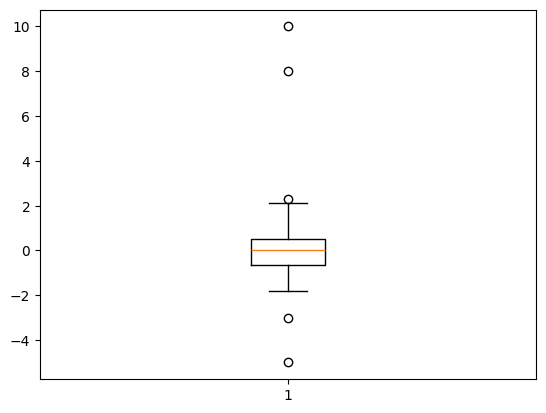

In [89]:
fig, ax = plt.subplots()
ax.boxplot(data)
plt.show()

In [90]:
Q3, Q1 = np.percentile(data, [75, 25])
IQR = Q3 - Q1
IQR

1.1644925829790964

In [94]:
min = Q1 - 1.5*IQR
max = Q3 + 1.5*IQR
data[(data < min) | (data > max)]

array([ 2.31256634,  8.        , 10.        , -3.        , -5.        ])

#### 이상치에 관심을 두는 이유
1. 데이터 품질 개선
    - 데이터 오류 탐지
    - 결측값 대체
2. 모델 성능 향상
    - 예측 모델 정확도 향상
    - 머신러닝 모델 학습
3. 통찰력 제공
    - 데이터 이해
    - 사회적, 경제적 의미
4. 모델 해석 가능성

In [124]:
# 사분위 범위수를 이용해서 이상치를 찾는 outlier2()
def outlier2(df, col):
    feature = df[col]
    # Q1, Q3 찾기
    Q3, Q1 = np.percentile(a=feature, q=[75, 25])

    # IQR 계산
    IQR = Q3 - Q1

    # min, max
    min = Q1 - 1.5*IQR
    max = Q3 + 1.5*IQR
    
    # 필터링
    outlier = feature[(feature < min) | (feature > max)]
    return outlier

In [127]:
outlier2(trade, "무역수지")

Series([], Name: 무역수지, dtype: float64)

### 정규화

In [128]:
# 정규분포를 따라 랜덤하게 데이터x 생성
a = np.random.randn(100) * 4 + 4
b = np.random.randn(100) - 1
x = pd.DataFrame({"A": a, "B": b})
x

,A,B
0,6.205792,-1.485248
1,-0.604047,-0.727779
2,3.018785,-0.517099
3,3.323325,-0.414949
4,6.167679,-0.582630
...,...,...
95,5.062917,-1.122239
96,-0.166839,-2.487547
97,-4.230178,0.589513
98,-0.562115,0.779614


In [129]:
# 표준화 기법으로 정규화
x_std = (x - x.mean()) / x.std()
x_std


,A,B
0,0.559307,-0.314995
1,-1.132240,0.407499
2,-0.232338,0.608450
3,-0.156691,0.705884
4,0.549839,0.545945
...,...,...
95,0.275419,0.031252
96,-1.023639,-1.271014
97,-2.032961,1.663966
98,-1.121824,1.845290


In [131]:
# min max 정규화
x_minmax = (x - x.min()) / (x.max() - x.min())
x_minmax

,A,B
0,0.607216,0.426240
1,0.267692,0.571821
2,0.448318,0.612312
3,0.463502,0.631944
4,0.605316,0.599717
...,...,...
95,0.550235,0.496008
96,0.289490,0.233606
97,0.086901,0.824995
98,0.269782,0.861531


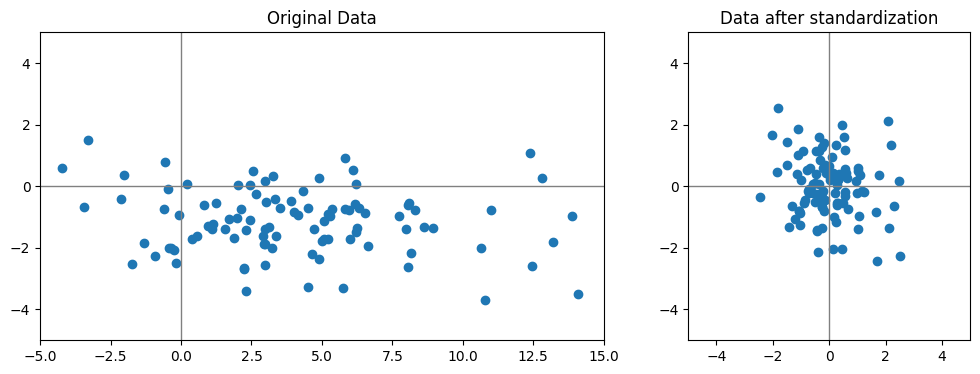

In [135]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4),
                        gridspec_kw={"width_ratios": [2, 1]})

axs[0].scatter(x["A"], x["B"])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c="grey", lw=1)
axs[0].axhline(c="grey", lw=1)
axs[0].set_title("Original Data")

axs[1].scatter(x_std["A"], x_std["B"])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c="grey", lw=1)
axs[1].axhline(c="grey", lw=1)
axs[1].set_title("Data after standardization")

plt.show()

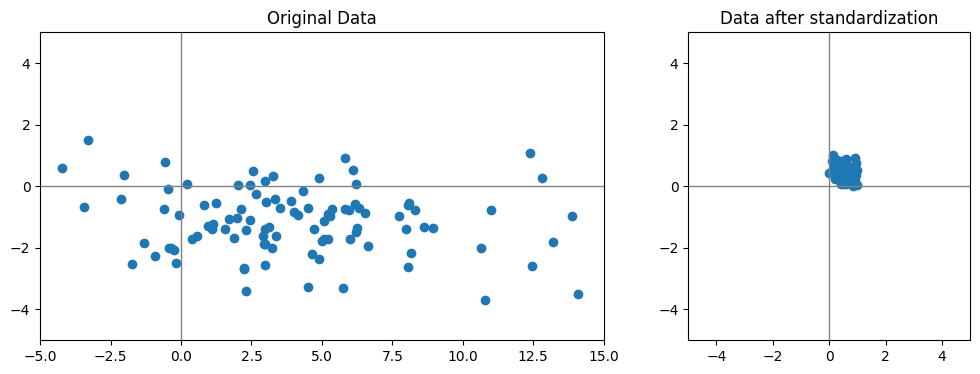

In [136]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4),
                        gridspec_kw={"width_ratios": [2, 1]})

axs[0].scatter(x["A"], x["B"])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c="grey", lw=1)
axs[0].axhline(c="grey", lw=1)
axs[0].set_title("Original Data")

axs[1].scatter(x_minmax["A"], x_minmax["B"])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c="grey", lw=1)
axs[1].axhline(c="grey", lw=1)
axs[1].set_title("Data after standardization")

plt.show()

In [137]:
# trade data 표준화
cols = ["수출건수", "수출금액", "수입건수", "수입금액", "무역수지"]
deviation = trade[cols] - trade[cols].mean()
trade_standardization = deviation / trade[cols].std()
trade_standardization.head()


,수출건수,수출금액,수입건수,수입금액,무역수지
0,-0.007488,1.399880,-0.163593,1.283660,1.257373
1,-0.689278,-0.250957,0.412529,-0.964444,0.402302
2,-0.847838,-1.088786,-0.993148,-0.863844,-1.096244
3,-0.417598,0.854114,-0.576399,0.705292,0.833331
4,-0.764918,-0.387703,0.146306,-1.276341,0.439233


In [138]:
trade_standardization.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,-1.093143e-16,-3.643809e-17,1.821904e-17,-5.465713e-17,-2.732857e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.194976e-01,-1.229312e+00,-9.984408e-01,-1.276341e+00,-1.602120e+00
25%,-5.937426e-01,-1.038997e+00,-7.673625e-01,-7.911669e-01,-1.115226e+00
50%,-4.373265e-01,-1.570528e-01,-3.429346e-01,-4.137392e-01,1.439519e-01
75%,4.420459e-01,1.038356e+00,3.927781e-01,8.827841e-01,7.473040e-01
max,5.486317e+00,2.078978e+00,3.239068e+00,2.376092e+00,2.434888e+00


In [139]:
# trade data minmax 스케일링
cols = ["수출건수", "수출금액", "수입건수", "수입금액", "무역수지"]
trade_min_max = (trade[cols] - trade[cols].min()) / (trade[cols].max() - trade[cols].min())
trade_min_max.head()

,수출건수,수출금액,수입건수,수입금액,무역수지
0,0.142372,0.794728,0.197014,0.700903,0.708320
1,0.035939,0.295728,0.332972,0.085394,0.496512
2,0.011187,0.042477,0.001249,0.112938,0.125310
3,0.078351,0.629759,0.099597,0.542551,0.603281
4,0.024131,0.254394,0.270146,0.000000,0.505660


In [140]:
trade_min_max.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.143541,0.371585,0.235620,0.349450,0.396858
std,0.156108,0.302271,0.235988,0.273790,0.247708
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050853,0.057527,0.054532,0.132836,0.120608
50%,0.075271,0.324113,0.154691,0.236172,0.432516
75%,0.212548,0.685450,0.328311,0.591147,0.581972
max,1.000000,1.000000,1.000000,1.000000,1.000000


### One-Hot 인코딩

In [142]:
# trade 데이터의 국가명 컬럼 원본
print(trade["국가명"].head())

# get_dummies 를 통해 one-hot 인코딩
country = pd.get_dummies(trade["국가명"])
country.head()

0    중국
1    미국
2    일본
3    중국
4    미국
Name: 국가명, dtype: object


,미국,일본,중국
0,False,False,True
1,True,False,False
2,False,True,False
3,False,False,True
4,True,False,False


In [143]:
# concat
trade = pd.concat([trade, country], axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,False,False,True
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,True,False,False
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,False,True,False
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,False,False,True
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,True,False,False


In [144]:
trade.drop(["국가명"], axis=1, inplace=True)
trade.head()

,기간,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,116932.0,12083947.0,334522.0,8143271.0,3940676.0,False,False,True
1,2015년 01월,65888.0,5561545.0,509564.0,3625062.0,1936484.0,True,False,False
2,2015년 01월,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,False,True,False
3,2015년 02월,86228.0,9927642.0,209100.0,6980874.0,2946768.0,False,False,True
4,2015년 02월,60225.0,5021264.0,428678.0,2998216.0,2023048.0,True,False,False


### 구간화

In [151]:
salary = pd.Series([4300, 8370, 1750, 3830, 1840, 4220, 3020, 2290, 4740, 4600, 
                    2860, 3400, 4800, 4470, 2440, 4530, 4850, 4850, 4760, 4500, 
                    4640, 3000, 1880, 4880, 2240, 4750, 2750, 2810, 3100, 4290, 
                    1540, 2870, 1780, 4670, 4150, 2010, 3580, 1610, 2930, 4300, 
                    2740, 1680, 3490, 4350, 1680, 6420, 8740, 8980, 9080, 3990, 
                    4960, 3700, 9600, 9330, 5600, 4100, 1770, 8280, 3120, 1950, 
                    4210, 2020, 3820, 3170, 6330, 2570, 6940, 8610, 5060, 6370,
                    9080, 3760, 8060, 2500, 4660, 1770, 9220, 3380, 2490, 3450, 
                    1960, 7210, 5810, 9450, 8910, 3470, 7350, 8410, 7520, 9610, 
                    5150, 2630, 5610, 2750, 7050, 3350, 9450, 7140, 4170, 3090])
len(salary)

100

<Axes: >

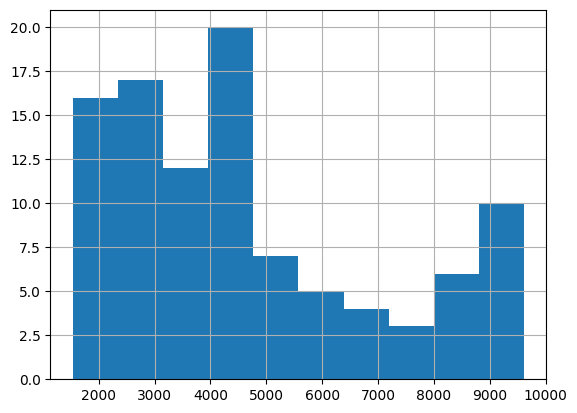

In [147]:
salary.hist()

In [149]:
# cut과 qcut을 이용해 수치형 데이터를 범주형 데이터로 변형
bins = [0, 2000, 4000, 6000, 8000, 10000]

In [150]:
ctg = pd.cut(salary, bins=bins)
ctg

0      (4000, 6000]
1     (8000, 10000]
2         (0, 2000]
3      (2000, 4000]
4         (0, 2000]
          ...      
95     (2000, 4000]
96    (8000, 10000]
97     (6000, 8000]
98     (4000, 6000]
99     (2000, 4000]
Length: 100, dtype: category
Categories (5, interval[int64, right]): [(0, 2000] < (2000, 4000] < (4000, 6000] < (6000, 8000] < (8000, 10000]]

In [152]:
print("salary[0]:", salary[0])
print("salary[0]가 속한 카테고리:", ctg[0])

salary[0]: 4300
salary[0]가 속한 카테고리: (4000, 6000]


In [154]:
# 구간별 카운트
ctg.value_counts().sort_index()

(0, 2000]        12
(2000, 4000]     34
(4000, 6000]     29
(6000, 8000]      9
(8000, 10000]    16
Name: count, dtype: int64

In [156]:
# 데이터 최솟값, 최댓값 사이 균등 분할
lin_ctg = pd.cut(salary, bins=6)
lin_ctg

0      (4230.0, 5575.0]
1      (8265.0, 9610.0]
2     (1531.93, 2885.0]
3      (2885.0, 4230.0]
4     (1531.93, 2885.0]
            ...        
95     (2885.0, 4230.0]
96     (8265.0, 9610.0]
97     (6920.0, 8265.0]
98     (2885.0, 4230.0]
99     (2885.0, 4230.0]
Length: 100, dtype: category
Categories (6, interval[float64, right]): [(1531.93, 2885.0] < (2885.0, 4230.0] < (4230.0, 5575.0] < (5575.0, 6920.0] < (6920.0, 8265.0] < (8265.0, 9610.0]]

In [157]:
lin_ctg.value_counts()

(1531.93, 2885.0]    27
(2885.0, 4230.0]     24
(4230.0, 5575.0]     21
(8265.0, 9610.0]     15
(6920.0, 8265.0]      7
(5575.0, 6920.0]      6
Name: count, dtype: int64

In [159]:
# qcut 구간 비율로 균등하게 나누는것이 아닌 분포 비율을 기준으로 나누기
dist_ctg = pd.qcut(salary, q=5)
dist_ctg
dist_ctg.value_counts()

(1539.999, 2618.0]    20
(2618.0, 3544.0]      20
(3544.0, 4648.0]      20
(4648.0, 7068.0]      20
(7068.0, 9610.0]      20
Name: count, dtype: int64